# Import Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
import TAZ

In [2]:
# %matplotlib widget

# Basic Fitting Example (WigBayes)

### Defining Mean Parameter Data

In [3]:
# Particle Types:
Target = TAZ.Particle(Z=73, A=181, I=7/2, mass=180.9479958, name='Ta-181')
Projectile = TAZ.Neutron

# Mean Parameters
EB    = (1e-5,1000)
false_dens = 1/6.0
# lvl_dens = [1/8.1, 1/9.3]
# gn2m   = [44.11355, 33.38697]
lvl_dens = [1/7.0, 1/10.0]
gn2m   = [45.0, 25.0]
gg2m   = [55.00000, 55.00000]
dfn   = [1, 1]
dfg   = [250, 250]
l     = [0, 0]
j     = [3.0, 4.0]

SGs = TAZ.Spingroup.zip(l, j)
reaction = TAZ.Reaction(targ=Target, proj=Projectile, lvl_dens=lvl_dens, gn2m=gn2m, nDOF=dfn, gg2m=gg2m, gDOF=dfg, spingroups=SGs, EB=EB, false_dens=false_dens)

print('Target Particle:')
print(repr(Target))
print()
print('Reaction Parameters')
print(reaction)

Target Particle:
Particle       = Ta-181
Atomic Number  = 73
Atomic Mass    = 181
Nuclear Spin   = 7/2
Mass           = 180.9479958 (amu)
Nuclear Radius = 0.6957683 (√b)


Reaction Parameters
Target Particle      = Ta-181
Projectile Particle  = neutron
Channel Radius       = 1.4957683 (√b)
Energy Bounds        = 1.000e-05 < E < 1.000e+03 (eV)
False Level Density  = 0.1666667 (1/eV)

                            3+     4+
Level Densities       0.142857    0.1
Brody Parameters      1.000000    1.0
Mean Neutron Width   45.000000   25.0
Neutron Width DOF     1.000000    1.0
Mean Gamma Width     55.000000   55.0
Gamma Width DOF     250.000000  250.0
Missing Fraction      0.000000    0.0


### Sample Resonance Ladder

In [4]:
Res, Types, Missed_Res, Missed_Types = reaction.sample()

### Running WigBayes

In [5]:
prior, log_likelihood_prior = TAZ.PTBayes(Res, reaction)
distributions = reaction.distributions('Wigner')
runMaster = TAZ.RunMaster(Res.E, reaction.EB, distributions, reaction.false_dens, prior, log_likelihood_prior, verbose=True)
# runMaster = TAZ.RunMaster(Res.E, reaction.EB, distributions, reaction.false_dens, verbose=True)
posterior = runMaster.WigBayes()
logLikelihood = runMaster.LogLikelihood()

Finding level-spacing probabilities for group 0.
Finding level-spacing probabilities for group 1.
Creating ENCORE pipeline.
Finished ENCORE initialization.
Starting WigBayes
Finished running WigBayes


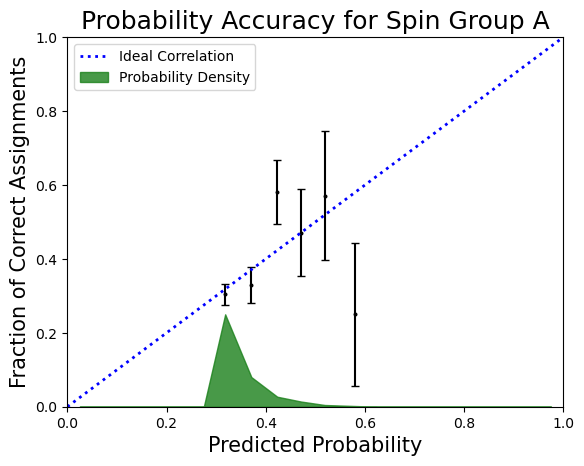

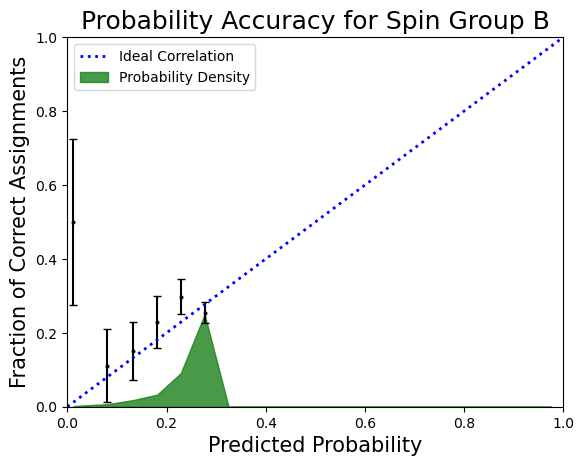

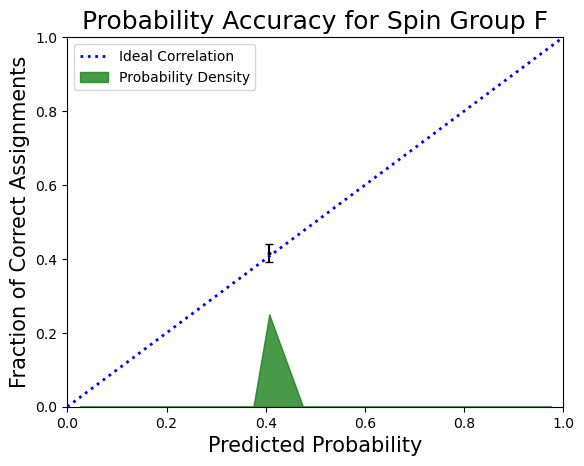

In [6]:
prior

TAZ.analysis.ProbCorrPlot(prior, Types, ['A', 'B', 'F'], fig_num=100)

### Analysis

PT-only score =  43.46%
Wigner+PT score =  48.89%

Confusion Matrix:
    A   B    F
A  61  31   33
B   2   6    4
F  73  64  131



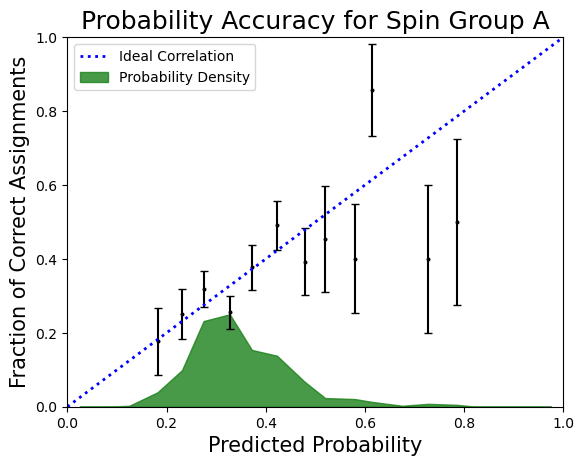

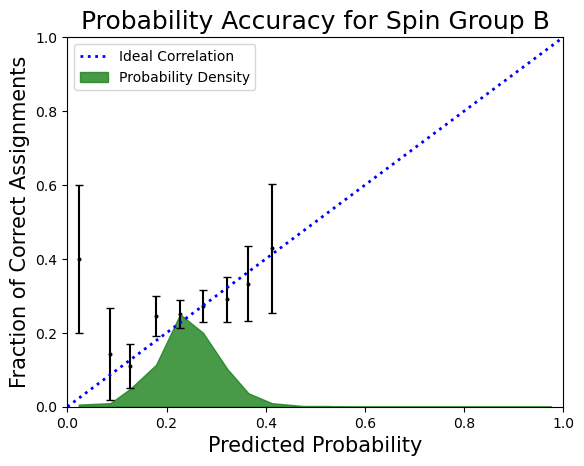

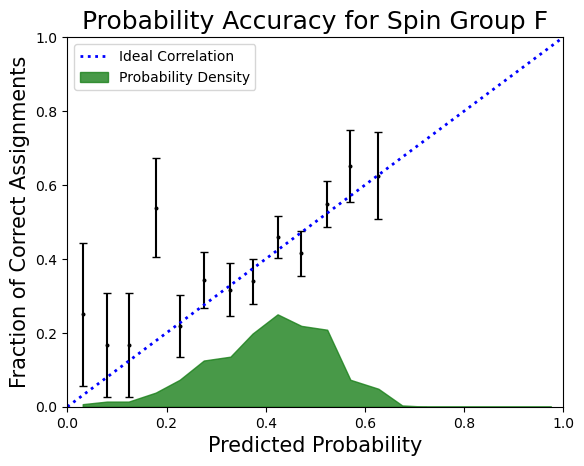

In [7]:
TAZ.analysis.PrintScore(prior, Types, 'PT-only')
TAZ.analysis.PrintScore(posterior, Types, 'Wigner+PT')
print()
TAZ.analysis.ConfusionMatrix(posterior, Types, ['A', 'B', 'F'])
print()
TAZ.analysis.ProbCorrPlot(posterior, Types, ['A', 'B', 'F'], fig_num=10)

### Posterior Results

In [8]:
print(posterior)

[[0.35472559 0.2875789  0.35769551]
 [0.34251483 0.30721839 0.35026679]
 [0.38163375 0.27934746 0.33901879]
 ...
 [0.26823117 0.2369216  0.49484723]
 [0.29041732 0.26633539 0.44324728]
 [0.46866181 0.19433757 0.33700063]]


# 3 Spingroup Case

In [9]:
EB    = (1e-5, 1000)
# pM    = [0.12547, 0.14404, 0.1]
false_dens = 0.05
# lvl_dens  = [1/8, 1/8.3065, 1/8, 1/7]
# gn2m   = [44.11355, 33.38697, 20, 25]
# gg2m   = [55.00000, 55.00000, 55.0, 55.0]
# dfn   = [1, 1, 1, 1]
# dfg   = [250, 250, 250, 250]
# l     = [0, 0, 1, 1]
# j     = [3.0, 4.0, 3.0, 4.0]
lvl_dens  = [1/8, 1/8.3065, 1/8]
gn2m   = [44.11355, 33.38697, 20]
gg2m   = [55.00000, 55.00000, 55.0]
dfn   = [1, 1, 1]
dfg   = [250, 250, 250]
l     = [0, 0, 1]
j     = [3.0, 4.0, 3.0]

SGs = TAZ.Spingroup.zip(l, j)
reaction = TAZ.Reaction(targ=Target, proj=Projectile, lvl_dens=lvl_dens, gn2m=gn2m, nDOF=dfn, gg2m=gg2m, gDOF=dfg, spingroups=SGs, EB=EB, false_dens=false_dens)

print('Printing Mean Parameters')
print(reaction)

Printing Mean Parameters
Target Particle      = Ta-181
Projectile Particle  = neutron
Channel Radius       = 1.4957683 (√b)
Energy Bounds        = 1.000e-05 < E < 1.000e+03 (eV)
False Level Density  = 0.0500000 (1/eV)

                           3+          4+       3-
Level Densities       0.12500    0.120388    0.125
Brody Parameters      1.00000    1.000000    1.000
Mean Neutron Width   44.11355   33.386970   20.000
Neutron Width DOF     1.00000    1.000000    1.000
Mean Gamma Width     55.00000   55.000000   55.000
Gamma Width DOF     250.00000  250.000000  250.000
Missing Fraction      0.00000    0.000000    0.000


In [10]:
Res, Types, Missed_Res, Missed_Types = reaction.sample()

In [11]:
prior, log_likelihood_prior = TAZ.PTBayes(Res, reaction)
distributions = reaction.distributions('Wigner')
runMaster = TAZ.RunMaster(Res.E, reaction.EB, distributions, reaction.false_dens, prior, log_likelihood_prior, verbose=True)
posterior = runMaster.WigBayes()
log_likelihood = runMaster.LogLikelihood()

Finding level-spacing probabilities for group 0.
Finding level-spacing probabilities for group 1.
Finding level-spacing probabilities for group 2.
Creating ENCORE pipeline.
Finished ENCORE initialization.
Starting WigBayes
Finished running WigBayes


### Analysis

In [12]:
print(posterior)

[[4.52279952e-01 4.37009079e-01 0.00000000e+00 1.10710968e-01]
 [1.02278029e-02 1.11283383e-02 8.96907266e-01 8.17365932e-02]
 [4.29780476e-01 4.03164533e-01 0.00000000e+00 1.67054991e-01]
 ...
 [3.75910336e-01 4.07649637e-01 1.09651225e-10 2.16440026e-01]
 [4.30213584e-01 3.68127439e-01 1.24015301e-52 2.01658977e-01]
 [7.78861757e-02 8.70638740e-02 6.77529029e-01 1.57520922e-01]]


PT-only score =  54.59%
Wigner+PT score =  54.59%

Confusion Matrix:
        A   B    C  False
A      64  68    1     17
B      44  45    4     13
C      15  10  117     17
False   3   1    0      6



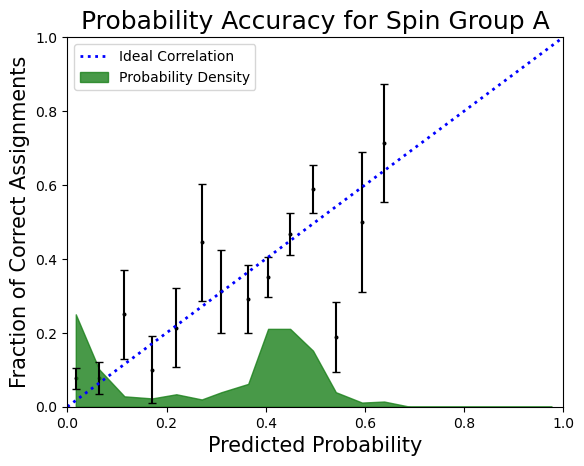

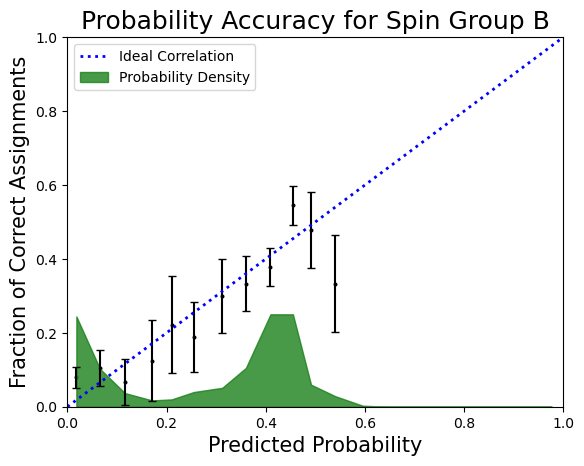

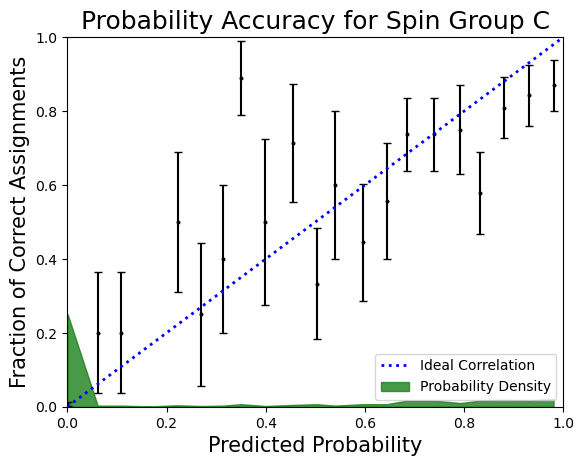

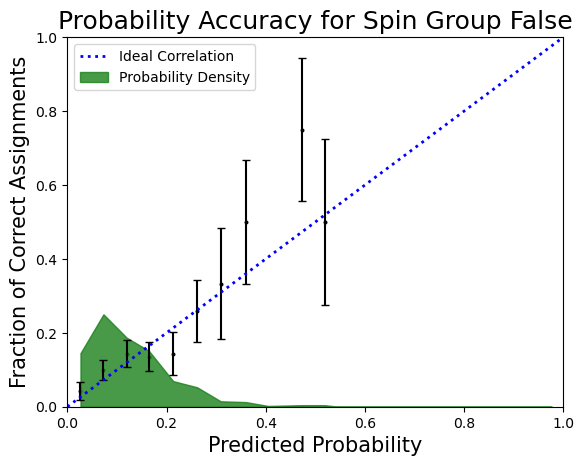

In [13]:
TAZ.analysis.PrintScore(prior, Types, 'PT-only')
TAZ.analysis.PrintScore(posterior, Types, 'Wigner+PT')
print()
TAZ.analysis.ConfusionMatrix(posterior, Types)
print()
TAZ.analysis.ProbCorrPlot(posterior, Types, fig_num=20)

# Basic Spingroup Sampling (WigSample)

### Defining Mean Parameter Data

In [14]:
# Particle Types:
Target = TAZ.Particle(Z=73, A=181, I=7/2, mass=180.9479958, name='Ta-181')
Projectile = TAZ.Neutron

# Mean Parameters
EB    = (1e-5, 2550)
pM    = [0.12547, 0.14404]
false_dens = 0
lvl_dens  = [1/8.9868, 1/8.3065]
gn2m   = [44.11355, 33.38697]
gg2m   = [55.00000, 55.00000]
dfn   = [1, 1]
dfg   = [250, 250]
l     = [0, 0]
j     = [3.0, 4.0]

SGs = TAZ.Spingroup.zip(l, j)
reaction = TAZ.Reaction(targ=Target, proj=Projectile, lvl_dens=lvl_dens, gn2m=gn2m, nDOF=dfn, gg2m=gg2m, gDOF=dfg, spingroups=SGs, EB=EB, false_dens=false_dens)

print('Printing Mean Parameters')
print(reaction)

Printing Mean Parameters
Target Particle      = Ta-181
Projectile Particle  = neutron
Channel Radius       = 1.4957683 (√b)
Energy Bounds        = 1.000e-05 < E < 2.550e+03 (eV)
False Level Density  = 0.0000000 (1/eV)

                            3+          4+
Level Densities       0.111274    0.120388
Brody Parameters      1.000000    1.000000
Mean Neutron Width   44.113550   33.386970
Neutron Width DOF     1.000000    1.000000
Mean Gamma Width     55.000000   55.000000
Gamma Width DOF     250.000000  250.000000
Missing Fraction      0.000000    0.000000


### Sample Resonance Ladder

In [15]:
Res, Types, Missed_Res, Missed_Types = reaction.sample()

### Running WigSample

In [16]:
num_trials = 100 # number of samples
Prior, TPPrior = TAZ.PTBayes(Res, reaction)
distributions = reaction.distributions('Wigner')
runMaster = TAZ.RunMaster(Res.E, reaction.EB, distributions, reaction.false_dens, Prior, TPPrior, verbose=False)
Samples = runMaster.WigSample(num_trials)

### Plotting Samples against Wigner Distribution

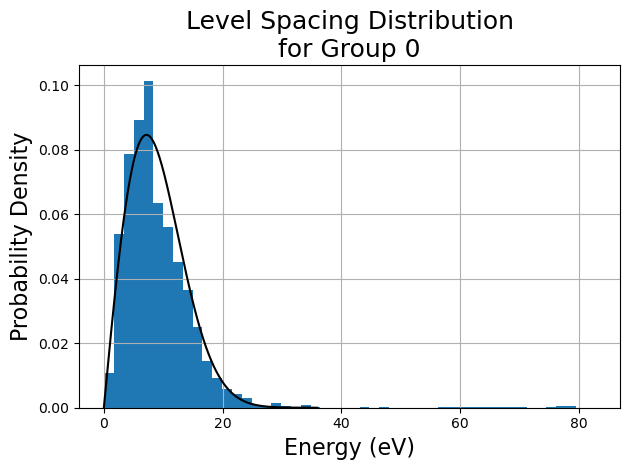

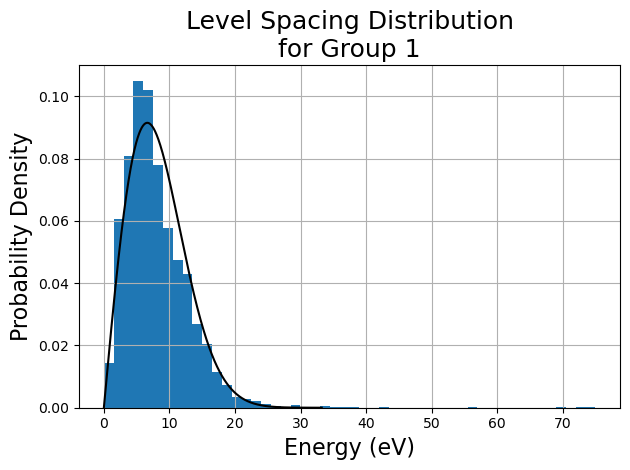

In [17]:
for g in range(2):
    lvl_spacing = np.zeros((0,))
    for trial in range(num_trials):
        E = Res.E[Samples[:,trial] == g]
        lvl_spacing = np.concatenate((lvl_spacing, np.diff(E)))
    lvl_spacing = np.sort(lvl_spacing)

    xMax = 4 / reaction.lvl_dens_all[g]
    L_fit = 1000
    X = np.linspace(0.0, xMax, L_fit)
    PDF = reaction.fit('level spacing', g)(X)

    plt.figure(g+30)
    plt.clf()
    plt.hist(lvl_spacing, 50, density=True)
    plt.plot(X, PDF, '-k')
    plt.grid()
    plt.title(f'Level Spacing Distribution\nfor Group {g}', fontsize=18)
    plt.xlabel('Energy (eV)', fontsize=16)
    plt.ylabel('Probability Density', fontsize=16)
    plt.tight_layout()
    plt.show()